# Optimization

## Importing Modules

In [1]:
from scipy import optimize

In [3]:
!pip install cvxopt

In [3]:
import cvxopt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [13]:
import sympy

## Classification of Optimization Problems

## Univariate Optimization

In [8]:
r, h = sympy.symbols("r, h")

In [9]:
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h

In [10]:
Volume = sympy.pi * r**2 * h

In [11]:
h_r = sympy.solve(Volume - 1)[0]

In [12]:
Area_r = Area.subs(h_r)

In [13]:
rsol = sympy.solve(Area_r.diff(r))[0]

In [14]:
rsol

2**(2/3)/(2*pi**(1/3))

In [15]:
_.evalf()

0.541926070139289

In [16]:
Area_r.diff(r, 2).subs(r, rsol)

12*pi

In [19]:
Area_r.subs(r, rsol)

3*2**(1/3)*pi**(1/3)

In [20]:
_.evalf()

5.53581044593209

In [21]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

In [22]:
r_min = optimize.brent(f, brack=(0.1, 4))

In [23]:
r_min

0.5419260772557135

In [24]:
f(r_min)

5.535810445932086

In [25]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

## Unconstrained Multivariate Optimization

In [26]:
x1, x2 = sympy.symbols("x_1, x_2")

In [27]:
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2

In [28]:
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

In [30]:
sympy.Matrix(fprime_sym)

Matrix([
[-2*x_2 + 4*(x_1 - 1)**3],
[   -2*x_1 + 10*x_2 - 10]])

In [31]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]

In [33]:
sympy.Matrix(fhess_sym)

Matrix([
[12*(x_1 - 1)**2, -2],
[             -2, 10]])

In [35]:
f_lambda = sympy.lambdify((x1, x2), f_sym)

In [36]:
fprime_lambda = sympy.lambdify((x1, x2), fprime_sym)

In [37]:
fhess_lambda = sympy.lambdify((x1, x2), fhess_sym)

In [38]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [39]:
f = func_XY_to_X_Y(f_lambda)

In [41]:
fprime = func_XY_to_X_Y(fprime_lambda)

In [42]:
fhess = func_XY_to_X_Y(fhess_lambda)

In [43]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [44]:
x_opt

array([1.88292613, 1.37658523])

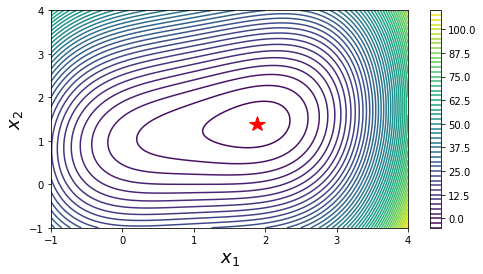

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lambda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=16)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c)

In [46]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [47]:
x_opt

array([1.88292645, 1.37658596])

In [48]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [49]:
x_opt

array([1.88292612, 1.37658523])

In [50]:
x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


In [51]:
x_opt 

array([1.88292644, 1.37658595])

In [52]:
x_opt = optimize.fmin_cg(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 54
         Gradient evaluations: 18


In [53]:
x_opt

array([1.88292612, 1.37658522])

In [54]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) +\
        (x - 1)**2 + (y - 1)**2

In [55]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), 
                         finish=None)

In [56]:
x_start

array([1.5, 1.5])

In [57]:
f(x_start)

-9.5

In [58]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [59]:
x_opt

array([1.47586906, 1.48365787])

In [60]:
f(x_opt)

-9.520229273055016

In [10]:
def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(s)

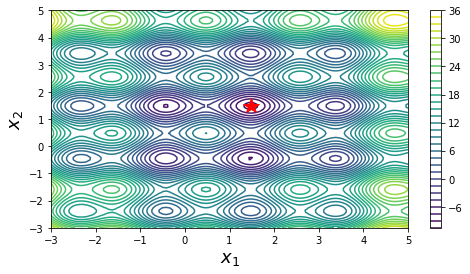

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 30)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=16)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c)

In [63]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [64]:
result = optimize.minimize(f, x_start, method='BFGS')

In [65]:
x_opt = result.x

In [66]:
x_opt

array([1.47586906, 1.48365787])

## Nonlinear Least Square Problems

In [67]:
beta = (0.25, 0.75, 0.5)

In [68]:
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [69]:
xdata = np.linspace(0, 5, 50)

In [70]:
y = f(xdata, *beta)

In [71]:
ydata = y + 0.05 * np.random.randn(len(xdata))

In [72]:
def g(beta):
    return ydata - f(xdata, *beta)

In [73]:
beta_start = (1, 1, 1)

In [74]:
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [75]:
beta_opt

array([0.25846323, 0.74171924, 0.54996022])

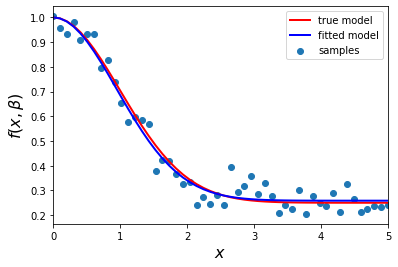

In [77]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=16)
ax.legend()

In [78]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)

In [79]:
beta_opt

array([0.25846323, 0.74171924, 0.54996022])

## Constrained Optimization

In [6]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

In [7]:
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x

In [8]:
bnd_x1, bnd_x2 = (2, 3), (0, 2)

In [9]:
x_cons_opt = optimize.minimize(f, [1, 1], method = 'L-BFGS-B', 
                               bounds = [bnd_x1, bnd_x2]).x

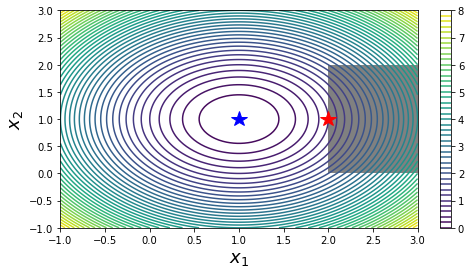

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=16)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=16)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), bnd_x1[1] - bnd_x1[0], 
                          bnd_x2[1] - bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c)

In [14]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")

In [15]:
f = x0 * x1 * x2

In [16]:
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1

In [17]:
L = f + l * g

In [18]:
grad_L = [sympy.diff(L, x_) for x_ in x]

In [19]:
sols = sympy.solve(grad_L)

In [20]:
sols

[{lambda: -sqrt(6)/24, x_0: sqrt(6)/6, x_1: sqrt(6)/6, x_2: sqrt(6)/6},
 {lambda: sqrt(6)/24, x_0: -sqrt(6)/6, x_1: -sqrt(6)/6, x_2: -sqrt(6)/6}]

In [22]:
g.subs(sols[0])

0

In [23]:
f.subs(sols[0])

sqrt(6)/36

In [ ]:
#inequality , SLSQP

In [24]:
def f(X):
    return - X[0] * X[1] * X[2]

In [25]:
def g(X):
    return 2 * (X[0]*X[1] + X[1]*X[2] + X[2]*X[0]) - 1

In [26]:
constraint = dict(type='eq', fun=g)

In [27]:
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', 
                           constraints=[constraint])

In [29]:
result

     fun: -0.06804136862287297
     jac: array([-0.16666925, -0.16666542, -0.16666526])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.40824188, 0.40825127, 0.40825165])

In [47]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2

In [48]:
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4

In [49]:
constraints = [dict(type='ineq', fun=g)]

In [50]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x

In [51]:
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', 
                               constraints = constraints).x

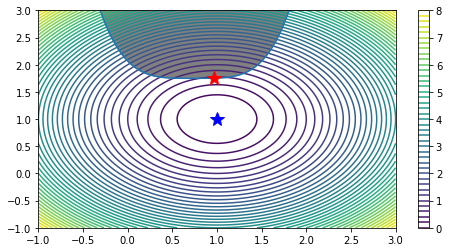

In [52]:
fig, ax = plt.subplots(figsize=(8, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 3, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_ - 0.75)**4, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
plt.colorbar(c)

> ### Linear Programming

In [53]:
c = np.array([-1.0, 2.0, -3.0])

In [54]:
A = np.array([[1.0, 1.0, 0], [-1.0, 3.0, 0.0], [0.0, -1.0, 1.0]])

In [55]:
b = np.array([1.0, 2.0, 3.0])

In [56]:
A_ = cvxopt.matrix(A)

In [57]:
b_ = cvxopt.matrix(b)

In [58]:
c_ = cvxopt.matrix(c)

In [59]:
sol = cvxopt.solvers.lp(c_, A_, b_)

Optimal solution found.


In [60]:
sol

{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 0.0,
 'dual infeasibility': 1.4835979218054372e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [61]:
x = np.array(sol['x'])

In [62]:
x

array([[0.25],
       [0.75],
       [3.75]])